In [18]:
# Wavefunction generation
from pyscf import mcscf, fci, lib 
from pyscf import gto, scf, tools, dft
from pyscf.dft import numint
import api as pyq 
import matplotlib.pyplot as plt
import importlib
import os
import h5py
import pdb
import pyscf
import numpy as np
from pyscf.scf.hf import dump_scf_summary
print(pyq.__file__)
print(pyscf.__file__)

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/usr/local/anaconda3/lib/python3.9/site-packages/pyscf/__init__.py


In [19]:
from math import pi
mol = gto.M(atom="H 0. 0. 0.", spin=1, basis=f'ccecpccpvdz', unit='bohr')
mf = scf.UHF(mol)
scf_checkfile = "scf.hdf5"
mf.kernel()

converged SCF energy = -0.49972077380239  <S^2> = 0.75  2S+1 = 2


-0.4997207738023898

In [20]:
dm = mf.make_rdm1()
kin = mf.mol.intor_symmetric('int1e_kin')
ein = mf.mol.intor_symmetric('int1e_nuc')
j, k= mf.get_jk(mf.mol, dm)

In [27]:
#Ekin
ekin = np.einsum('ij,sji->', kin, dm).real
#EI
ei = np.einsum('ij,sji->', ein, dm).real
#EJ
ej = 0.5*np.einsum('sij,sji->', j, dm).real
ek = 0.5*np.einsum('sij,sji->', k, dm).real
#ENUC
enuc = mf.energy_nuc()
print('e1', ekin + ei, 'coul', ej, 'nuc', enuc)
#Compare to PYSCF
mf.energy_tot()
print(mf.scf_summary)

e1 -0.4997207738023897 coul 0.31241940086331144 nuc 0
{'e1': -0.4997207738023896, 'e2': -3.12815322383097e-17, 'nuc': 0}


In [28]:
#Grid
size = 1000
np.zeros((size, 3))
for i in range(3):
    pos[:,i] = np.random.normal(0, 2, size)
r = np.linalg.norm(pos, axis=1)
pos.shape

(1000, 3)

In [29]:
#Overlaps
aox = dft.numint.eval_ao(mol, pos, deriv=2)
ao0 = aox[0]
ao1 = aox[1:4]
ao2 = aox[4:4]
orb_coeffs = mf.mo_coeff[0]

#Density Matrix
dm = mf.make_rdm1()

In [31]:
mo_value = np.einsum('ij,sjk,sk->ik', ao0, mf.mo_coeff, mf.mo_occ)
rho = np.einsum('ij,ji->i', mo_value, mo_value.T)

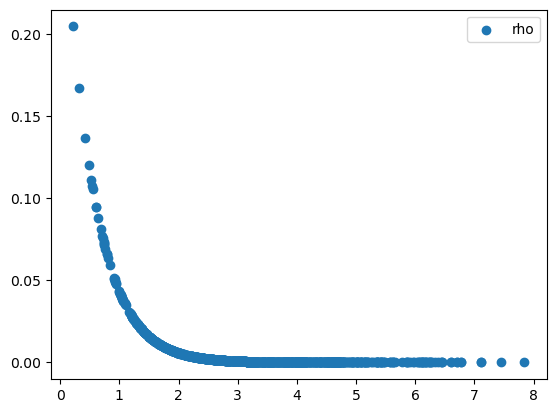

In [33]:
#user RHO
plt.scatter(r, rho, label='rho')
plt.legend()

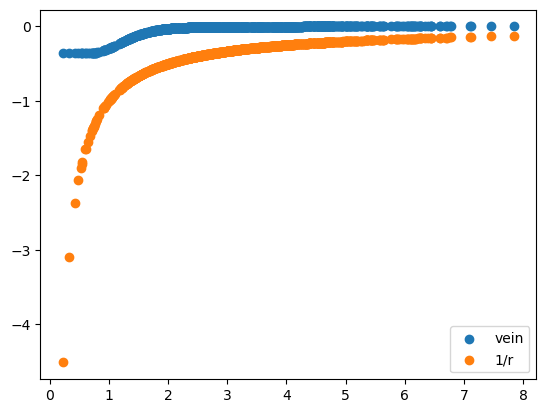

In [55]:
#EIN vs 1/r
vein = np.einsum('ij,jk,ki->i', ao0, ein, ao0.T).real
plt.scatter(r, vein, label='vein')
plt.scatter(r, -1./r, label='1/r')
plt.legend()

In [64]:
vh = []
eh = []
for i, ri in enumerate(pos):
    with mol.with_rinv_origin(ri):
        # pdb.set_trace()
        vh.append(np.einsum('ij,sij->', mol.intor('int1e_rinv'), dm).real)
        eh.append(np.einsum('ij,sij', mol.intor('int1e_rinv'), dm).real*rho[i])
vh = np.array(vh)  
vh_2 = np.einsum('ij,sjk,ki->i', mo_value, j, mo_value.T).real

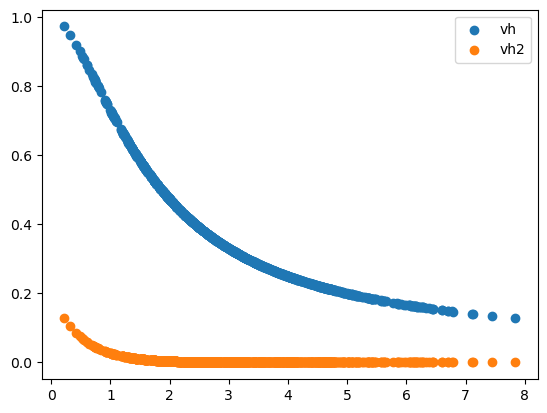

In [65]:
plt.scatter(r, vh, label='vh')
plt.scatter(r, vh_2, label='vh2')
# plt.xlim((0,5))
# plt.ylim((-2,2))
plt.legend()

In [67]:
# # Above curve is inconsistent, lets calculate Eh using two methods with regular grid
# mol = mf.mol
# coords = mf.grids.coords
# weights = mf.grids.weights
# reg_grid = numint.eval_ao(mol, coords)

AttributeError: 'HF1e' object has no attribute 'grids'